<a href="https://colab.research.google.com/github/babycandyy/babycandyy/blob/main/Crime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install libraries
!pip install pandas numpy scikit-learn seaborn

In [ ]:
#import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR, SVC
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix
from sklearn.neural_network import MLPRegressor, MLPClassifier
import statsmodels.api as sm

In [ ]:
#create file path and load data
df =pd.read_csv('/content/crime - crime (1).csv')
df

,ViolentCrime,Murder,Rape,Robbery,AggravatedAssault,PropertyCrime,Burglary,Theft,MotorVehicleTheft
0,412.5,5.3,56.0,78.4,272.8,"3,609.00",852,"2,493.60",263.4
1,238.4,5.1,38.2,75.2,119.8,"2,552.40",575.3,"1,853.00",124.1
2,667.9,7.8,30.4,157.9,471.8,"3,894.10","1,099.60","2,652.80",141.7
3,114.3,2.5,28.2,20.7,63.0,"3,208.40",484.6,"2,476.10",247.7
4,792.6,6.1,63.8,206.7,516.0,"4,607.80",883.4,"3,047.60",676.9
...,...,...,...,...,...,...,...,...,...
373,251.6,11.4,6.3,74.6,159.3,823.2,265.5,531.1,26.6
374,237.5,11.5,5.2,82.3,138.6,"1,320.00",377.1,861.6,81.3
375,231.4,18.0,5.0,66.2,142.2,885,214.4,632.4,38.1
376,92.1,5.4,4.6,16.1,66.0,420,168.9,226.5,24.6


In [ ]:
df.head(5)

,ViolentCrime,Murder,Rape,Robbery,AggravatedAssault,PropertyCrime,Burglary,Theft,MotorVehicleTheft
0,412.5,5.3,56.0,78.4,272.8,"3,609.00",852,"2,493.60",263.4
1,238.4,5.1,38.2,75.2,119.8,"2,552.40",575.3,"1,853.00",124.1
2,667.9,7.8,30.4,157.9,471.8,"3,894.10","1,099.60","2,652.80",141.7
3,114.3,2.5,28.2,20.7,63.0,"3,208.40",484.6,"2,476.10",247.7
4,792.6,6.1,63.8,206.7,516.0,"4,607.80",883.4,"3,047.60",676.9


In [ ]:
df.tail(6)

,ViolentCrime,Murder,Rape,Robbery,AggravatedAssault,PropertyCrime,Burglary,Theft,MotorVehicleTheft
372,99.3,6.9,2.7,53.1,36.6,"1,031.90",287.3,670.8,73.8
373,251.6,11.4,6.3,74.6,159.3,823.2,265.5,531.1,26.6
374,237.5,11.5,5.2,82.3,138.6,"1,320.00",377.1,861.6,81.3
375,231.4,18.0,5.0,66.2,142.2,885,214.4,632.4,38.1
376,92.1,5.4,4.6,16.1,66.0,420,168.9,226.5,24.6
377,262,20.6,4.9,157.8,78.7,"1,281.20",281.8,835,164.3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ViolentCrime       377 non-null    object 
 1   Murder             378 non-null    float64
 2   Rape               378 non-null    float64
 3   Robbery            378 non-null    float64
 4   AggravatedAssault  377 non-null    float64
 5   PropertyCrime      372 non-null    object 
 6   Burglary           374 non-null    object 
 7   Theft              375 non-null    object 
 8   MotorVehicleTheft  378 non-null    float64
dtypes: float64(5), object(4)
memory usage: 26.7+ KB


In [ ]:
df.describe()

,Murder,Rape,Robbery,AggravatedAssault,MotorVehicleTheft
count,378.000000,378.000000,378.000000,377.000000,378.000000
mean,4.574868,41.306614,77.702646,241.319098,191.081746
std,3.383652,19.506386,53.977181,137.267225,134.532918
min,0.000000,2.700000,2.300000,25.500000,15.700000
25%,2.200000,29.000000,36.625000,144.200000,97.550000
50%,3.800000,37.550000,67.350000,215.700000,154.450000
75%,6.275000,51.550000,106.050000,304.900000,249.650000
max,20.600000,165.600000,351.900000,981.300000,718.600000


In [ ]:
df.shape

(378, 9)

In [ ]:
df.size

3402

In [ ]:
#missing values
df.isnull().sum()

,0
ViolentCrime,1
Murder,0
Rape,0
Robbery,0
AggravatedAssault,1
PropertyCrime,6
Burglary,4
Theft,3
MotorVehicleTheft,0


In [ ]:
df.fillna(df.mean, inplace=True)
df

,ViolentCrime,Murder,Rape,Robbery,AggravatedAssault,PropertyCrime,Burglary,Theft,MotorVehicleTheft
0,412.5,5.3,56.0,78.4,272.8,"3,609.00",852,"2,493.60",263.4
1,238.4,5.1,38.2,75.2,119.8,"2,552.40",575.3,"1,853.00",124.1
2,667.9,7.8,30.4,157.9,471.8,"3,894.10","1,099.60","2,652.80",141.7
3,114.3,2.5,28.2,20.7,63.0,"3,208.40",484.6,"2,476.10",247.7
4,792.6,6.1,63.8,206.7,516.0,"4,607.80",883.4,"3,047.60",676.9
...,...,...,...,...,...,...,...,...,...
373,251.6,11.4,6.3,74.6,159.3,823.2,265.5,531.1,26.6
374,237.5,11.5,5.2,82.3,138.6,"1,320.00",377.1,861.6,81.3
375,231.4,18.0,5.0,66.2,142.2,885,214.4,632.4,38.1
376,92.1,5.4,4.6,16.1,66.0,420,168.9,226.5,24.6


In [ ]:
df.isnull().mean()

,0
ViolentCrime,0.0
Murder,0.0
Rape,0.0
Robbery,0.0
AggravatedAssault,0.0
PropertyCrime,0.0
Burglary,0.0
Theft,0.0
MotorVehicleTheft,0.0


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [21]:
df= pd.read_csv('/content/crime - crime (1).csv')
df

,ViolentCrime,Murder,Rape,Robbery,AggravatedAssault,PropertyCrime,Burglary,Theft,MotorVehicleTheft
0,412.5,5.3,56.0,78.4,272.8,"3,609.00",852,"2,493.60",263.4
1,238.4,5.1,38.2,75.2,119.8,"2,552.40",575.3,"1,853.00",124.1
2,667.9,7.8,30.4,157.9,471.8,"3,894.10","1,099.60","2,652.80",141.7
3,114.3,2.5,28.2,20.7,63.0,"3,208.40",484.6,"2,476.10",247.7
4,792.6,6.1,63.8,206.7,516.0,"4,607.80",883.4,"3,047.60",676.9
...,...,...,...,...,...,...,...,...,...
373,251.6,11.4,6.3,74.6,159.3,823.2,265.5,531.1,26.6
374,237.5,11.5,5.2,82.3,138.6,"1,320.00",377.1,861.6,81.3
375,231.4,18.0,5.0,66.2,142.2,885,214.4,632.4,38.1
376,92.1,5.4,4.6,16.1,66.0,420,168.9,226.5,24.6


In [22]:
le = LabelEncoder()
df['Encoded_Burglary']= le.fit_transform(df['Burglary'])

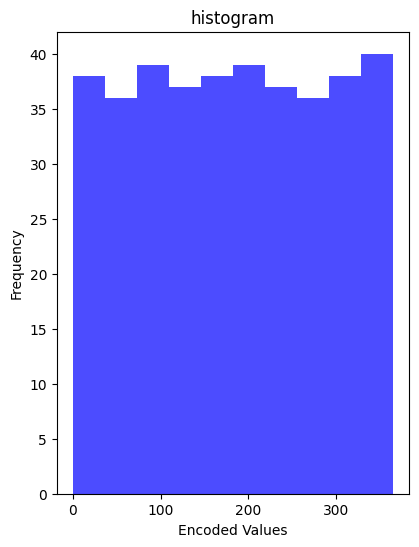

In [23]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(df['Encoded_Burglary'], bins='auto', alpha=0.7, color='blue')
plt.title('histogram')
plt.xlabel('Encoded Values')
plt.ylabel('Frequency')
plt.show()